In [18]:
# import the required library
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [19]:
admission_data = pd.read_csv('/home/jishnu/clubs/iedc/mlcc/datasets/admission_basedon_exam_scores.csv',header=None)
admission_data.head()


,0,1,2
0,Exam 1 marks,Exam 2 marks,Admission status
1,34.62365962451697,78.0246928153624,0
2,30.28671076822607,43.89499752400101,0
3,35.84740876993872,72.90219802708364,0
4,60.18259938620976,86.30855209546826,1


In [20]:
admission_data.describe()

,0,1,2
count,101,101,101
unique,101,101,3
top,Exam 1 marks,Exam 2 marks,1
freq,1,1,60


In [21]:
admission_data.dtypes

0    object
1    object
2    object
dtype: object

In [22]:
# converting the datatype
x = admission_data.values[1:,:-1].astype('float64')
y = admission_data.values[1:,-1].astype('int32')


In [23]:
x.shape
x.dtype

dtype('float64')

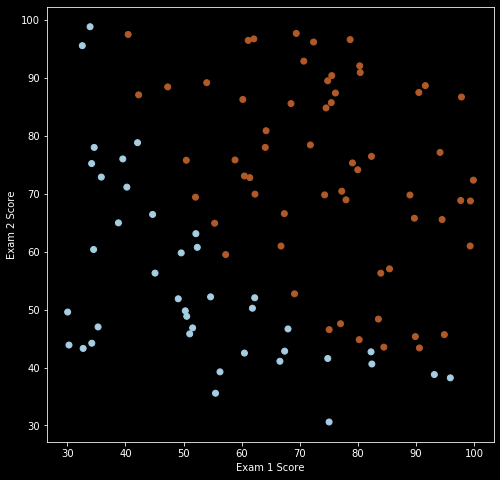

In [24]:
# ploting the data
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.xlabel('Exam 1 Score')
plt.ylabel('Exam 2 Score')
plt.scatter(x[:, 0], x[:, 1], c=y, cmap='Paired')


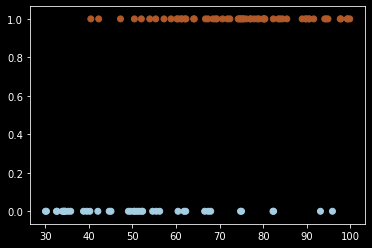

In [25]:
# plot x[:,0],y c =y cmap = 'paired'
plt.scatter(x[:,0],y,c=y,cmap='Paired')
plt.show()

In [26]:
# train_test_split
from sklearn.model_selection import train_test_split as tts

In [27]:
# train_test_split(x,y,test_size = ,randomstate = , shuffle = )
# [X_train, X_test, y_train, y_test]

X_train,X_test,y_train,y_test = tts(x,y,test_size=0.2,random_state=0)

In [28]:
# display the shape of x_train
X_train.shape

(80, 2)

In [29]:
# model define 
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression()

In [30]:
# fit or train with out dataset
logistic_model.fit(X_train,y_train)

LogisticRegression()

In [31]:
# prediction
pred = logistic_model.predict(X_test)
print(pred[0:10])
print(y_test[0:10])

[0 0 0 0 1 1 0 1 0 1]
[1 0 0 0 1 1 1 1 0 1]


In [32]:
logistic_model.score(X_test,y_test)

0.8

In [33]:
logistic_model.score(X_train,y_train)

0.9125

KeyboardInterrupt: 

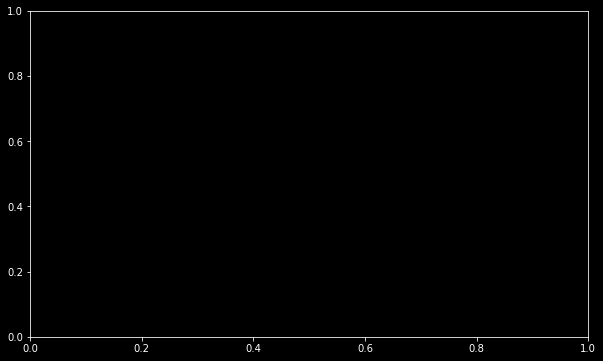

In [17]:

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X_train[:, 0].min() - .5, X_train[:, 0].max() + .5
y_min, y_max = X_train[:, 1].min() - .5, X_train[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logistic_model.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(10, 6))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
# Plot also the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Exam 1 marks')
plt.ylabel('Exam 2 marks')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title("Decision Boundary")
plt.show()
